# Badges

Every pre-registered attendee at the 1994 Machine Learning Conference and 1994 Computational Learning Theory Conference received a badge labeled with a "+" or "-".  The labeling was due to some function known only to the badge generator (Haym Hirsh), and it depended only on the attendee's name.  The goal for conference attendees was to identify the unknown function used to generate the +/- labeling.

Part of the problem in using an automated program to discover the unknown target function is to decide how to encode names such that the program can be used.  The data below are presented in the form of a +/- label followed by the person's name.  It is up to the learning-system user to decide how to convert this data into something usable by the system (e.g., what attributes to use if your favorite learner requires feature-vector data).


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

#df_badges = pd.read_csv('badges.data', header=None)
df_badges = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/badges/badges.data', header=None)
df_badges[:5]

,0
0,+ Naoki Abe
1,- Myriam Abramson
2,+ David W. Aha
3,+ Kamal M. Ali
4,- Eric Allender


In [3]:
# Utility functions
from sklearn.metrics import confusion_matrix,precision_score,recall_score, f1_score

def printResults(y_test,y_pred,y_train=None,y_train_pred=None):
    from sklearn.metrics import confusion_matrix,precision_score,recall_score, f1_score

    if y_train is not None and y_train_pred is not None:
        print('==== Training set ====')
        print(confusion_matrix(y_true=y_train, y_pred=y_train_pred))
        print('Precision: %.3f' % precision_score(y_true=y_train, y_pred=y_train_pred))
        print('Recall: %.3f' % recall_score(y_true=y_train, y_pred=y_train_pred))
        print('F1 train: %.3f' % f1_score(y_true=y_train, y_pred=y_train_pred))
        print('')
    print('==== Test set ====')
    print(confusion_matrix(y_true=y_test, y_pred=y_pred))
    print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
    print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
    print('F1 test: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

def plot_confusion_matrix(cm, labels, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def parseLine(line,maxlen):
    if (line[0] == '-'):
        label=0
    else:
        label=1
    fullName=line[2:].ljust(maxlen-2).lower()
    return (label,list(fullName))

def parseNameArray(line,maxlen):
    fullName=line[2:].ljust(maxlen-2).lower()
    return list(fullName)

def parseLabel(line):
    if (line[0] == '-'):
        label=0
    else:
        label=1
    return label

def parseCountInSet(line,aSet):
    return len(set([ch  for ch in line.lower() if ch in aSet]))

In [4]:
with open('badges.data','r') as f:
  lines=[line.rstrip() for line in f.readlines()]
maxlen=max([len(line) for line in lines])
lines[:5]

['+ Naoki Abe',
 '- Myriam Abramson',
 '+ David W. Aha',
 '+ Kamal M. Ali',
 '- Eric Allender']

### Add to the model the number of vowels, consonants and letters in case these are used for the label determination

In [5]:
vowels=set(['a','e','i','o','u','y'])
consonants=set(['b','c','d','f','g','h','j','k','l','m','n','p','q','r','s','t','v','w','x','z'])
letters=consonants.union(vowels)
labels=np.array([parseLabel(line) for line in lines])
nameArrays=np.array([parseNameArray(line,maxlen) for line in lines])
vowelsCounts=np.array([parseCountInSet(line,vowels) for line in lines])
consonantsCounts=np.array([parseCountInSet(line,consonants) for line in lines])
lettersCounts=np.array([parseCountInSet(line,letters) for line in lines])
df=pd.DataFrame(nameArrays)
df[:5]

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,n,a,o,k,i,,a,b,e,,...,,,,,,,,,,
1,m,y,r,i,a,m,,a,b,r,...,,,,,,,,,,
2,d,a,v,i,d,,w,.,,a,...,,,,,,,,,,
3,k,a,m,a,l,,m,.,,a,...,,,,,,,,,,
4,e,r,i,c,,a,l,l,e,n,...,,,,,,,,,,


### One-hot-encode letters positions and counts of vowels/consonants/letters

In [6]:
encoded=pd.get_dummies(df[range(maxlen-2)])
encoded['vowelsCounts']=vowelsCounts.reshape(-1,1)
encoded['consonantsCounts']=consonantsCounts.reshape(-1,1)
encoded['lettersCounts']=lettersCounts.reshape(-1,1)
encoded['label']=labels.reshape(-1,1)
encoded[:10]

,0_a,0_b,0_c,0_d,0_e,0_f,0_g,0_h,0_i,0_j,...,22_,22_a,23_,23_t,24_,24_t,vowelsCounts,consonantsCounts,lettersCounts,label
0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,4,3,7,1
1,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,4,5,9,0
2,0,0,0,1,0,0,0,0,0,0,...,1,0,1,0,1,0,2,4,6,1
3,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,2,3,5,1
4,0,0,0,0,1,0,0,0,0,0,...,1,0,1,0,1,0,3,5,8,0
5,0,0,0,1,0,0,0,0,0,0,...,1,0,1,0,1,0,3,4,7,1
6,0,0,1,0,0,0,0,0,0,0,...,1,0,1,0,1,0,3,6,9,0
7,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,4,5,9,1
8,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,2,4,6,1
9,0,0,0,0,0,0,0,0,0,1,...,1,0,1,0,1,0,2,6,8,1


In [7]:
# prepare data set
X=encoded.values[:,:-1]
y=encoded.values[:,-1]

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### Grid Search to find best parameters for LogisticRegression

In [8]:
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('clf', LogisticRegression(random_state=0))])
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'clf__C': param_range, 
               'clf__penalty': ['l1','l2'],
               'clf__solver': ['liblinear']},
               {'clf__C': param_range, 
               'clf__penalty': ['l2'],
               'clf__solver': ['lbfgs','newton-cg']}]

gs = GridSearchCV(estimator=pipe_lr, 
                   param_grid=param_grid, 
                   scoring='f1', 
                   cv=5,
                   n_jobs=-1)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid=[{'clf__penalty': ['l1', 'l2'], 'clf__C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0], 'clf__solver': ['liblinear']}, {'clf__penalty': ['l2'], 'clf__C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0], 'clf__solver': ['lbfgs', 'newton-cg']}],
       pre_dispatch='2*n_jobs', refit=True, scoring='f1', verbose=0)

In [9]:
print(gs.best_score_) 
print(gs.best_params_)
gs.best_estimator_

0.993650793651
{'clf__penalty': 'l1', 'clf__C': 1000.0, 'clf__solver': 'liblinear'}


Pipeline(steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])

In [38]:
# extract the logistic regression classifier from the pipeline
lr=gs.best_estimator_.named_steps['clf']
lr

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [41]:
# L1 regularization yields sparse results
print('coefficients == 0: %d' % sum((lr.coef_ == 0)[0]))
print('coefficients != 0: %d' % sum((lr.coef_ != 0)[0]))

coefficients == 0: 298
coefficients != 0: 169


### Get the 8 most influential coefficients

In [43]:
bestColIdx=np.argsort(lr.coef_[0])[-8:]
print('best coefs: %s' % (lr.coef_[0][bestColIdx]))
print('corresp columns: %s' % (encoded.columns.values[bestColIdx]))

best coefs: [ 0.34471187  0.39790218  0.55471173  0.57790253  0.83332446  1.35756617
  1.74520729  1.87922224]
corresp columns: ['2_c' '0_r' '1_u' '2_n' '1_i' '1_e' '1_o' '1_a']


### Best coefficients: 'j' at position 9, 'g' at position 6, 'c' at position 2, 'r' at position 0...

### Verify that only with these 8 features we can achieve a F1 score close to 1

In [44]:
encoded2=pd.DataFrame.copy(encoded.iloc[:,bestColIdx])
encoded2['label']=encoded['label'].copy()
encoded2[:5]

,2_c,0_r,1_u,2_n,1_i,1_e,1_o,1_a,label
0,0,0,0,0,0,0,0,1,1
1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,1,1
4,0,0,0,0,0,0,0,0,0


In [45]:
X2=encoded2.values[:,:-1]
y2=encoded2.values[:,-1]

In [46]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.25, random_state=0)

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train2)
X_train_std2 = sc.transform(X_train2)
X_test_std2 = sc.transform(X_test2)

In [52]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000.0, penalty='l1', random_state=0)
lr.fit(X_train_std2, y_train2)

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [53]:
y_test_pred2 = lr.predict(X_test_std2)

In [54]:
cm=confusion_matrix(y_true=y_test2, y_pred=y_test_pred2)
cm

array([[18,  0],
       [ 0, 56]])

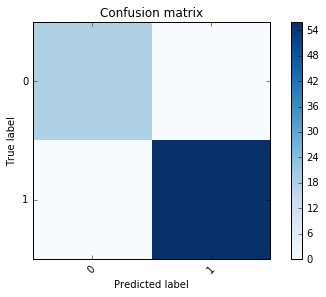

In [51]:
plot_confusion_matrix(cm,labels=["0","1"])